1. Import and analyse the data set.
Hint: - Use `imdb.load_data()` method
 - Get train and test set
 - Take 10000 most frequent words

In [1]:
#Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)
from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences


2.5.0


In [2]:
max_sequence_length = 100
num_distinct_words = 10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)
print(x_train.shape)
print(x_test.shape)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,)
(25000,)


/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


2. Perform relevant sequence adding on the data

In [4]:
# Model configuration
max_sequence_length = 100
num_distinct_words = 10000
embedding_output_dims = 15
loss_function = 'binary_crossentropy'
optimizer = 'adam'
additional_metrics = ['accuracy']
number_of_epochs = 50
verbosity_mode = True
validation_split = 0.20

In [5]:
padded_inputs = pad_sequences(x_train, maxlen=max_sequence_length, value = 0.0)
padded_inputs_test = pad_sequences(x_test, maxlen=max_sequence_length, value = 0.0)

. Perform following data analysis:
• Print shape of features and labels
• Print value of any one feature and it's label

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


4. Decode the feature value to get original sentence

In [7]:
for i in np.random.randint(0, len(padded_inputs), 3):
  INDEX_FROM=3   # word index offset
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(padded_inputs[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in padded_inputs[i] ))


Sample = 2078 | Length = 100
jewish villagers as they prepare to be moved to concentration camps and the church service where willie <UNK> richard <UNK> <UNK> his nazi upbringing whilst mourning for his girlfriend <UNK> dorothy morris <UNK> daughter after she has been shot at a <UNK> br br throughout the film knox is <UNK> and is very convincing as a bitter <UNK> and evil man martha hunt has some powerful moments and matches him with her strength and henry <UNK> is also very good in his role as a priest this film delivers an effective story that stays with you once it has finished
Sample = 15622 | Length = 100
candy was great <UNK> <UNK> and <UNK> brown as the <UNK> mentioned eye candy i was laughing a lot from the few scenes i saw br br my friends wonder why i never want to go to horror movies if they saw this film they would know why i would get thrown out for laughing so hard br br just a couple of trivia notes <UNK> brown who played ben white had played captain american in a made f

Design, train, tune and test a sequential model. Design, train, tune and test a sequential model. 

In [8]:
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(Dropout(0.50))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(Dropout(0.50))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 15)           150000    
_________________________________________________________________
dropout (Dropout)            (None, 100, 15)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 32)           992       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0

In [11]:
history = model.fit(padded_inputs, y_train, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

Epoch 1/50
625/625 [==============================] - 7s 10ms/step - loss: 0.6412 - accuracy: 0.5998 - val_loss: 0.4536 - val_accuracy: 0.8078
Epoch 2/50
625/625 [==============================] - 6s 10ms/step - loss: 0.3751 - accuracy: 0.8336 - val_loss: 0.3498 - val_accuracy: 0.8508
Epoch 3/50
625/625 [==============================] - 6s 10ms/step - loss: 0.2942 - accuracy: 0.8754 - val_loss: 0.3319 - val_accuracy: 0.8562
Epoch 4/50
625/625 [==============================] - 6s 10ms/step - loss: 0.2559 - accuracy: 0.8926 - val_loss: 0.3390 - val_accuracy: 0.8488
Epoch 5/50
625/625 [==============================] - 6s 10ms/step - loss: 0.2336 - accuracy: 0.9046 - val_loss: 0.3453 - val_accuracy: 0.8514
Epoch 6/50
625/625 [==============================] - 6s 10ms/step - loss: 0.2083 - accuracy: 0.9150 - val_loss: 0.3595 - val_accuracy: 0.8456
Epoch 7/50
625/625 [==============================] - 6s 10ms/step - loss: 0.2070 - accuracy: 0.9160 - val_loss: 0.3746 - val_accuracy: 0.8434

In [12]:
test_results = model.evaluate(padded_inputs_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 0.6567197442054749 - Accuracy: 81.15599751472473%


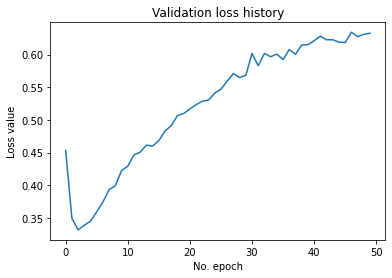

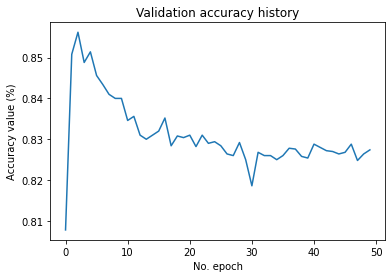

In [13]:
# Visualize history
# Plot history: Validation loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()